# Change Point Method
Consider a sequence $x_1$, $x_2$, $\ldots$, $x_T$ as observations of independent Gaussian random variables $X_1$, $X_2$, ..., $X_T$. The goal is to identify whether all $x_i$ , $i=1,\ldots,T$ have been generated by the same Gaussian distribution $N(\eta_0,\sigma^2)$, or a change in stationarity occurred at certain point $t^\ast$ so that $x_i$, $i < t^\ast$ is drawn from $N(\eta_0,\sigma^2)$ and $x_i$, $i≥t^\ast$ from $N(\eta_1,\sigma^2)$. In case a change is present, we also want to estimate the change time $t^\ast$.

## Implement a CPM
To answer the above questions, we implement the Change Point Method (CPM) described below.

Define a function <font color='#bd4147'>my_cpm(x, alpha)</font> that applies the CPM described below to sequence $x=[x_1, x_2, \cdots, x_T]$ of length $T$, and returns <font color='#bd4147'>None</font> if no significant change is detected, otherwise it returns the estimated time $t_e$.

Scheme of a CPM:
<p><ol>
    <li>For each $t$ from $1$ to $T-1$ apply a two-sample t-test to sub-sequences $[x_1, \cdots, x_t]$ and $[x_t+1, \cdots, x_T]$ and store the obtained statistic $S(t)$ and p-value $p(t)$. (Hint: you can use method <font color='#bd4147'>scipy.stats.ttest_1samp</font>)</li>
    <li>Select time $t_e=argmax$ $S(t)$ where statistic is maximal and consider it as candidate to be the estimated time of the change.</li>
    <li>compare $p(t_e)$ with significance level $\alpha$ to decide if there is statistical evidence of a change at time $t_e$.</li>
    <li>Return $t_e$ if a significant change is detected, <font color='#bd4147'>None</font> otherwise.</li>
</ol></p>

In [174]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
from scipy import stats


''' 
parameters:
    x = an array of values for the random variable X from x_1 to x_T
    alpha = significance level alpha which in default I consider its value as 0.05
            Just for being match in notation I assumed (alpha = 1 - p-value) so
            if alpha = 0.05 it means p-value = 0.95
returns None if no significant change is detected, otherwise it returns the estimated time t_e
'''
def my_cpm(x, alpha=0.05):
    T = len(x)
    # place holder for statistic S(t) and p-value p(t)
    statistic = []
    pvalue = []
    
    for t in range(2,T-1):
        ''' 
            This is a two-sided test for the null hypothesis that 2 independent
            samples have identical average (expected) values.
            This test assumes that the populations have identical variances by default.
        ''' 
        # 
        # 
        s, p = stats.ttest_ind(x[0:t],x[t:])
        statistic.append(s)
        pvalue.append(p)
    
    t_e = np.argmax(np.absolute(statistic))
    
    if pvalue[t_e] < alpha:
        # reject null hypothesis (change happening)
        return t_e+2
    else:
        # no statistical evidence to reject null hypothesis (no change happening)
        return None

### Some explanation about the python implementation

For better implementation, I consider the changing point time $t$ from $2$ to $T-2$ because it is practically impossible to calculate the statistic test $S(t)$ and p-value $p(t)$ test between one array and one single value. Also in concept I think it would be better to do not consider first element of our observation sequence as a changing point.

For the same reason, I sum the return value with number $2$ because I was using a local array variable inside this function which the first element of my array is corresponding to the third element of the observation sequence.

The test statistic tells us how much the two sample mean deviates from each other assuming for the null hypothesis that 2 independent samples have identical average (expected) values. Since the sample could differ in either the positive or negative direction, for computing the $argmax$ of $S(t)$ I consider the absolute value of this statistic test $S(t)$. In other worlds, the derivation can be in both positive an negative direction and I want to find the time $t$ which gives me the two arrays which deviate most from each others.


The test yields a p-value which means there is a $p(t)$ chance I'd see sample data this far apart if the two groups tested are actually identical. As I was using a $95\%$ confidence level as default value I would fail to reject the null hypothesis if the p-value is greater or equal than the corresponding significance level of $5\%$.

## Test the CPM on a sequence
<p><ol>
    <li>Generate a sequence $x_1, x_2, ..., x_T$ by sampling the first $200$ real numbers from $N(0,2)$, then other $100$ from $N(1,2)$; this means $T=300$ and $t^*=200$.</li>
    <li>Apply <font color='#bd4147'>my_cpm(x, alpha)</font> to the generated sequence with signifcance level $\alpha=0.05$.</li>
    <li>Plot statistic $S(t)$ and p-value $p(t)$ as function of time.</li>
    <li>Does the CPM detected a change? What is the associated confidence level?</li>
</ol></p>

The computed change point index (t_e) =  226
The maximum statistic is at this point: (time =  228  ,Statistic S(t) = -3.17096343151  P-value p(t) = 0.00167761737457 )


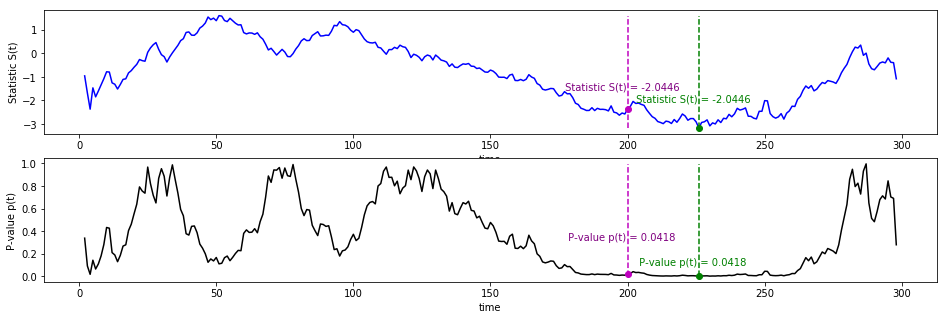

In [175]:
# fix seed to get the same result
np.random.seed(12345678)

# for generating sample I am using "stats.norm.rvs" function which have the following parameters
# -----
# loc = The location (loc) keyword specifies the mean of the sample
# scale = The scale (scale) keyword specifies the standard deviation
# size = the size of the sample or number of different random generated numbers
# first200samples = stats.norm.rvs(loc=0,scale=2,size=200)
mu=0
sigma=2
first200samples = np.random.normal(mu, sigma, 200)
# print("first samples")
# print(first200samples)
# second100samples = stats.norm.rvs(loc=1,scale=2,size=100)
mu=1
sigma=2
second100samples = np.random.normal(mu, sigma, 100)
# print("second samples")
# print(second100samples)
t_star = 200
samples = np.concatenate((first200samples,second100samples))
# print("concatinated samples")
# print(samples)

print("The computed change point index (t_e) = ",my_cpm(samples, alpha=0.05))


''' Ploting statistic S(t) and p-value p(t) as a function of time'''
def t_test_plots(x, alpha=0.05):
    T = len(x)
    # place holder for statistic S(t) and p-value p(t)
    statistic = []
    pvalue = []
    
    for t in range(2,T-1):
        s, p = stats.ttest_ind(x[0:t],x[t:])
        statistic.append(s)
        pvalue.append(p)
        
    t_e = np.argmax(np.absolute(statistic))
    
    time_array = range(2,T-1)
    fig, (plot1, plot2) = plt.subplots(nrows=2, ncols=1, figsize=(16,5))
    plot1.set_xlabel('time')
    plot1.set_ylabel('Statistic S(t)')
    plot1.plot(time_array, statistic,'b')
    plot2.set_xlabel('time')
    plot2.set_ylabel('P-value p(t)')
    plot2.plot(time_array, pvalue,'k')
    
    # plot indicator vertical line on the graph for showing the maximum statistic time t_e
    plot1.plot([t_e+2 , t_e+2 ], [min(statistic),max(statistic)],'--g')
    print("The maximum statistic is at this point: (time = ",time_array[t_e+2],
          " ,Statistic S(t) =", statistic[t_e]," P-value p(t) =", pvalue[t_e],")")
    plot1.plot([time_array[t_e]], [statistic[t_e]], 'go')
    plot1.text(time_array[t_e]-24, statistic[t_e]+1.1, 
               " Statistic S(t) = "+str(round(statistic[t_star],4)), color='green')
    
    plot2.plot([t_e+2 , t_e+2 ], [min(pvalue),max(pvalue)],'--g')
    plot2.plot([time_array[t_e]], [pvalue[t_e]], 'go')
    plot2.text(time_array[t_e]-23, pvalue[t_e]+0.1, 
               " P-value p(t) = "+str(round(pvalue[t_star],4)), color='green')
    
    # plot indicator vertical line on the graph for showing the real t_star
    plot1.plot([t_star , t_star ], [min(statistic),max(statistic)],'--m')
    plot1.plot([time_array[t_star-2]], [statistic[t_star-2]], 'mo')
    plot1.text(time_array[t_star-2]-24, statistic[t_star-2]+0.8, 
               " Statistic S(t) = "+str(round(statistic[t_star],4)), color='purple')
    
    plot2.plot([t_star , t_star ], [min(pvalue),max(pvalue)],'--m')
    plot2.plot([time_array[t_star-2]], [pvalue[t_star-2]], 'mo')
    plot2.text(time_array[t_star-2]-23, pvalue[t_star-2]+0.3, 
               " P-value p(t) = "+str(round(pvalue[t_star],4)), color='purple')
    
t_test_plots(samples, alpha=0.05)


### Some explanation about the python Implementation

For generating Gaussian random number I used $\texttt{np.random.normal()}$ function but at first I used $\texttt{stats.norm.rvs()}$ which the corresponding line of code commented at the code block. For testing them you only need to uncomment them and comment the one which is running now.

As you can see from the above figure, the maximum absolute value for the statistic $S(t)$ is $2.0446$ which correspond to the $t_e=226$, the green vertical line on the graphs. The calculated p-value for this index of the time is $p(t) = 0.0418$. By comparing this value to $alpha=0.05$ this point is chosen as change point in our observation sequence.

However, the actual and real time of change, $t^\ast$, is now exactly what we caculated at this change point method. This point presented by purple vertical line on both graphs.

To answer this question that "Does the CPM detected a change?" my answer is yes. It was not as accurate as it must be to identify change point but still acceptable the real value $t^\ast = 200$ and $t_e=226$.

The associated confidence level of this point can be computed using this formula $\alpha = 1 - p$ which $\alpha$ is significance level and $p$ is the confidence level. Thus the confidence level $p$ for $t_e = 226$ is equal to:
$$p = 1 - 0.0418 = 0.9582$$

This confidence level is slightly greater that its limit $0.95$ which means that we can reject the null hypothesis and consider this point as change point.

Finally, I want to note that the function $\texttt{stats.ttest_ind}$ that I used to compute the statistical t-test is calculating the two-sided (two-tailed) test. And if I you want to compute the one-tailed test the only thing you need to do is just comparing the $\texttt{pvalue/2}$ with $\alph$ instead.


## References:

<p>
    <ol>
        <li>Python for Data Analysis Part 24: Hypothesis Testing and the T-Test. http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html</li>
        <li>Python Scipy library documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html</li>
        <li>How to perform two-sample one-tailed t-test with numpy/scipy? https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy
</li>
        <li>Understanding Hypothesis Tests: Significance Levels (Alpha) and P values in Statistic http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests-significance-levels-alpha-and-p-values-in-statistics</li>
        <li>What are the differences between one-tailed and two-tailed tests? https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/</li>
    </ol>
</p>